In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import hopsworks
from dotenv import dotenv_values
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt

/home/mezba/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# REPLACE .api_key WITH YOUR OWN KEY_VALUE
config = dotenv_values(".api_key")
hopsworks_key = config["HOPSWORKS_KEY"]
#print(hopsworks_key)

In [5]:
# Log in To Hopsworks
project = hopsworks.login(api_key_value=hopsworks_key)
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/193692
Connected. Call `.close()` to terminate connection gracefully.


In [6]:
# Read raw comments and apply sentiment
df = pd.read_csv('cleaned_comments.csv')
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
print(df)


                                                 comment  sentiment
0                                          thankyou adam     0.0000
1                                             good video     0.4404
2      How many maximum comments can we pull at a tim...     0.6640
3      Only the top level comments are returned throu...     0.2023
4             How do I put the comments into spreadsheet     0.0000
...                                                  ...        ...
60910                                        Works to me     0.0000
60911  Help me win this amazing CS GO giveaway from I...     0.9001
60912  RickFox looking good on nbcsvu  dont forget ab...     0.5523
60913  That was actually good criticism A lot of game...    -0.3570
60914  GhostRecon the first ones free the next 3 term...     0.8100

[60915 rows x 2 columns]


In [7]:
# We have our labelled_comments.csv file
df.to_csv('labelled_comments.csv', index=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60915 entries, 0 to 60914
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   comment    60915 non-null  object 
 1   sentiment  60915 non-null  float64
dtypes: float64(1), object(1)
memory usage: 951.9+ KB


In [ ]:
# Show Sentiment Distribution
#g = sns.violinplot(y='sentiment', x='comment', data=df, inner='quartile')
#plt.show()

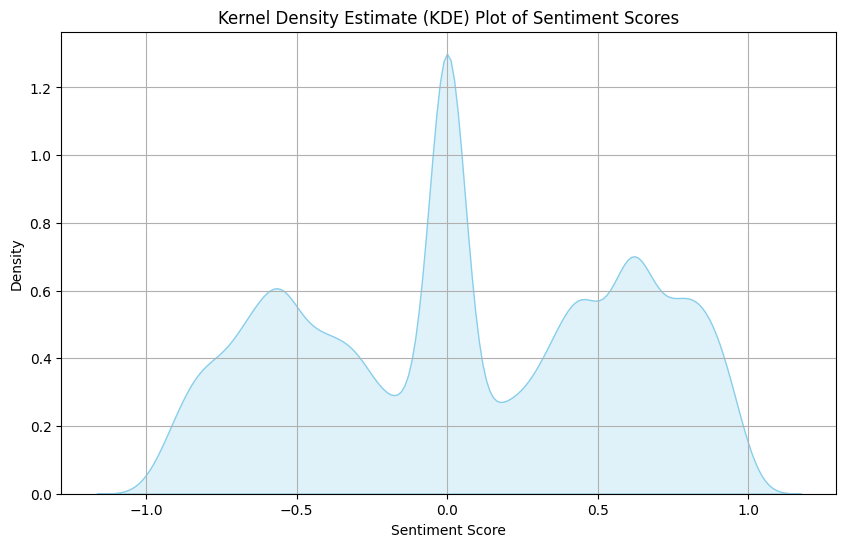

In [23]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.kdeplot(df['sentiment'], fill=True, color='skyblue')
plt.title('Kernel Density Estimate (KDE) Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [24]:
# Hopsworks Write to a Feature Group 

comments_fg = fs.get_or_create_feature_group(
    name="comments",
    version=1,
    primary_key=["comment"],
    description="Youtube Comments Dataset",
)

comments_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/193692/fs/193611/fg/361857


Uploading Dataframe: 100.00% |██████████| Rows 60915/60915 | Elapsed Time: 00:21 | Remaining Time: 00:00


Launching job: comments_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/193692/jobs/named/comments_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f9a0abf2c80>, None)